In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('/content/Marketing.csv')
df

,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0
1,2,2021-02-01,facebOOK_tier2,social,348934,220688,16300.20,1640,48,3,14962.0
2,3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981.0
3,4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114.0
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490.0
...,...,...,...,...,...,...,...,...,...,...,...
303,304,2021-02-28,instagram_tier2,social,983498,775780,760.75,1024,4,0,0.0
304,305,2021-02-28,facebook_retargeting,social,4387490,1933,224.81,58,0,0,0.0
305,306,2021-02-28,facebook_lal,social,544756,25840,6844.80,248,5,1,1491.0
306,307,2021-02-28,instagram_blogger,influencer,374754,94058,4845.65,594,12,1,5008.0


In [ ]:
## Mengetahui informasi umum mengenai data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             308 non-null    int64  
 1   c_date         308 non-null    object 
 2   campaign_name  308 non-null    object 
 3   category       308 non-null    object 
 4   campaign_id    308 non-null    int64  
 5   impressions    308 non-null    int64  
 6   mark_spent     308 non-null    float64
 7   clicks         308 non-null    int64  
 8   leads          308 non-null    int64  
 9   orders         308 non-null    int64  
 10  revenue        308 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usage: 26.6+ KB


In [ ]:
## Karena tipe data kolom 'c_date'maka perlu Mengubah tipe datanya dari object ke waktu
df['c_date'] = pd.to_datetime(df['c_date'])
print(df.dtypes)

id                        int64
c_date           datetime64[ns]
campaign_name            object
category                 object
campaign_id               int64
impressions               int64
mark_spent              float64
clicks                    int64
leads                     int64
orders                    int64
revenue                 float64
dtype: object


In [ ]:
## Mengetahui inforamsi statistik dasar mengenai data
df.describe()

,id,c_date,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
count,308.000000,308,3.080000e+02,3.080000e+02,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,154.500000,2021-02-14 12:00:00,9.605628e+06,5.122475e+06,99321.038377,9739.996753,212.918831,26.113636,1.392512e+05
min,1.000000,2021-02-01 00:00:00,1.093400e+04,6.670000e+02,169.750000,20.000000,0.000000,0.000000,0.000000e+00
25%,77.750000,2021-02-07 18:00:00,1.278230e+05,1.479568e+05,9465.195000,1347.250000,20.750000,3.000000,8.580000e+03
50%,154.500000,2021-02-14 12:00:00,3.747540e+05,6.028100e+05,36765.150000,4349.500000,84.000000,9.000000,3.891700e+04
75%,231.250000,2021-02-21 06:00:00,4.387490e+06,3.254450e+06,129372.250000,13499.250000,270.500000,29.250000,1.370492e+05
max,308.000000,2021-02-28 00:00:00,8.945984e+07,4.199700e+08,880357.000000,61195.000000,1678.000000,369.000000,2.812520e+06
std,89.056162,NaN,2.543040e+07,2.631134e+07,144008.011181,12157.476244,300.459978,42.741288,2.763031e+05


In [5]:
## Mengecek missing value & duplikat (tidak ditemukan missing values/ duplicate)
df.isna().sum()
df.duplicated().sum()


np.int64(0)

In [6]:
### Total order per jenis iklan/campaign
orders_campaign_category = df.groupby('campaign_name')['orders'].sum().sort_values(ascending=False)
orders_campaign_category

,orders
campaign_name,
youtube_blogger,1914
banner_partner,1566
instagram_blogger,1100
instagram_tier1,758
facebOOK_tier2,688
google_wide,547
facebook_tier1,474
instagram_tier2,313
facebook_lal,294


In [ ]:
## mengetahui CTR atau click trough rate

CTR = ((df.groupby('campaign_name')['clicks'].sum())/(df.groupby('campaign_name')['impressions'].sum()))*100

CTR = CTR.rename('CTR')
CTR = CTR.reset_index()

CTR





,campaign_name,CTR
0,Banner_Partner,0.039314
1,Facebook_Lal,0.945147
2,Facebook_Retargeting,3.066905
3,Facebook_Tier1,0.380676
4,Facebook_Tier2,0.473941
5,Google_Hot,1.945304
6,Google_Wide,0.354675
7,Instagram_Blogger,0.879325
8,Instagram_Tier1,0.359293
9,Instagram_Tier2,0.370078


In [12]:
##mengetahui tingkat konversi dalam persen (contoh = Banner_Partner	0.372854%)

conversion_rate = ((df.groupby('campaign_name')['orders'].sum())/(df.groupby('campaign_name')['clicks'].sum()))*100


conversion_rate = conversion_rate.rename('conversion_rate')
conversion_rate = conversion_rate.reset_index()

conversion_rate



,campaign_name,conversion_rate
0,banner_partner,0.372854
1,facebOOK_tier2,0.208502
2,facebook_lal,0.244976
3,facebook_retargeting,0.360553
4,facebook_tier1,0.197502
5,google_hot,0.312056
6,google_wide,0.227911
7,instagram_blogger,0.366717
8,instagram_tier1,0.280781
9,instagram_tier2,0.061374


In [15]:
## Mengetahui CPC/Cost per Click

CPC = (df.groupby('campaign_name')['mark_spent'].sum())/(df.groupby('campaign_name')['clicks'].sum())

CPC = CPC.rename('CPC')
CPC = CPC.reset_index()

CPC


,campaign_name,CPC
0,banner_partner,11.968188
1,facebOOK_tier2,14.225015
2,facebook_lal,22.013959
3,facebook_retargeting,8.895848
4,facebook_tier1,10.686773
5,google_hot,13.326212
6,google_wide,9.418103
7,instagram_blogger,14.159827
8,instagram_tier1,9.502399
9,instagram_tier2,2.090530


In [16]:
## mengetahui ROMI/ Return on Marketing Investment setiap kategori iklan

ROMI = ((df.groupby('campaign_name')['revenue'].sum())/(df.groupby('campaign_name')['mark_spent'].sum()))*100

ROMI = ROMI.rename('ROMI in %')
ROMI = ROMI.reset_index()

ROMI

,campaign_name,ROMI in %
0,banner_partner,122.406169
1,facebOOK_tier2,73.783579
2,facebook_lal,11.364114
3,facebook_retargeting,201.496085
4,facebook_tier1,93.434891
5,google_hot,183.812440
6,google_wide,66.329726
7,instagram_blogger,136.754211
8,instagram_tier1,177.139683
9,instagram_tier2,62.885864


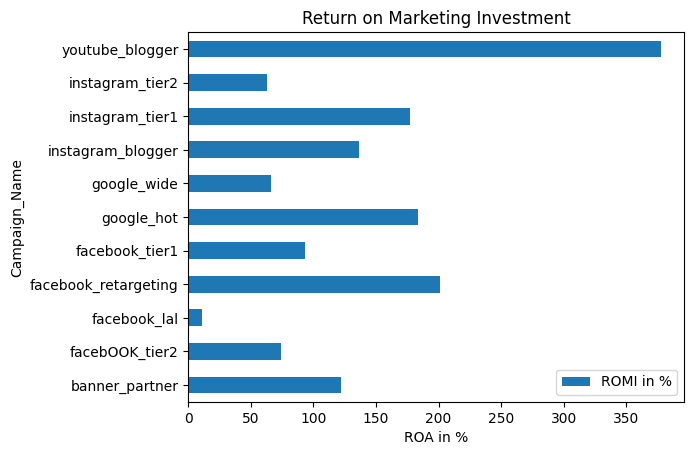

In [17]:
###  Visualisasi ROMI/ Return on Marketing Investment setiap kategori iklan

ROMI.plot(kind='barh')

plt.xlabel("ROA in %")
plt.ylabel("Campaign_Name")
plt.title("Return on Marketing Investment")
plt.yticks(range(len(ROMI)), ROMI['campaign_name'])
plt.show()

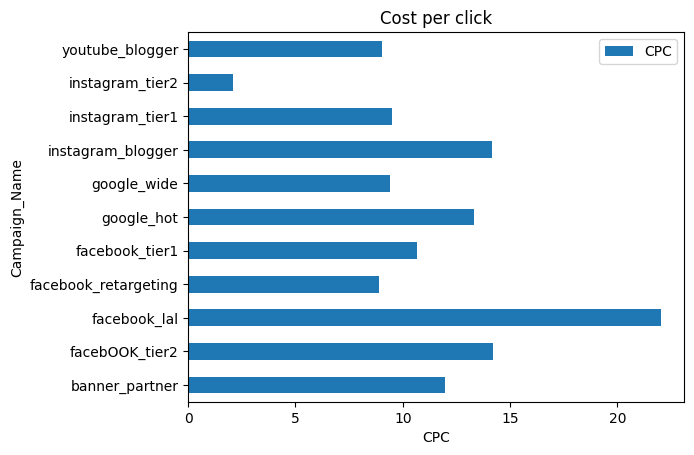

In [18]:
# Visualisasi CPC

CPC.plot(kind='barh')

plt.xlabel("CPC")
plt.ylabel("Campaign_Name")
plt.title("Cost per click")
plt.yticks(range(len(CPC)), CPC['campaign_name'])
plt.show()

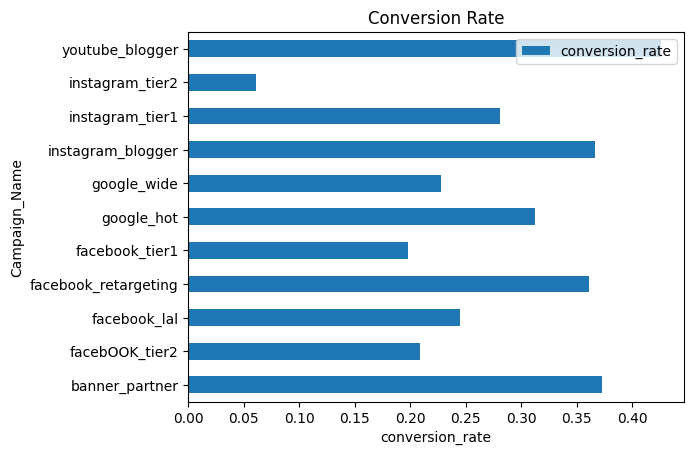

In [19]:
# Visualisasi coversion rate

conversion_rate.plot(kind='barh')

plt.xlabel("conversion_rate")
plt.ylabel("Campaign_Name")
plt.title("Conversion Rate")
plt.yticks(range(len(conversion_rate)), conversion_rate['campaign_name'])
plt.show()